# Process the churches of L.A. County

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
import json
import numpy as np
import altair as alt
import altair_latimes as lat

In [4]:
alt.themes.register("latimes", lat.theme)
alt.themes.enable("latimes")
pd.options.display.max_columns = 50
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

### Get our download churches file

In [52]:
gdf = gpd.read_file("raw/geo/churches.geojson")

<AxesSubplot:>

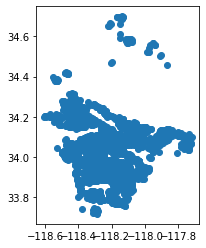

In [53]:
gdf.plot()

### Drop columns we don't need

In [54]:
gdf.drop(
    [
        "source",
        "org_name",
        "ext_id",
        "cat1",
        "cat2",
        "cat3",
        "zip",
        "link",
        "use_type",
        "date_updated",
        "dis_status",
        "POINT_X",
        "POINT_Y",
        "addrln1",
        "addrln2",
        "city",
        "state",
        "hours",
        "phones",
        "url",
        "info1",
        "info2",
        "post_id",
        "description",
        "email",
    ],
    axis=1,
    inplace=True,
)

In [73]:
gdf.rename(columns={"Name": "church_name", "OBJECTID": "id"}, inplace=True)

In [74]:
gdf["nuname"] = gdf["church_name"]

### Parse church types from their names

In [95]:
types = {
    "christian": (
        "Methodist",
        "Episcopal",
        "Presbyterian",
        "Orthodox",
        "Catholic",
        "Lutheran",
        "Reformed",
        "Calvinist",
        "Church of God",
        "Pentecostal",
        "Christian",
        "Church of Christ",
        "Evangelical",
        "Independent",
        "Seventh Day Adventist",
        "Wesleyan",
    )
}

In [95]:
Adventist
Baptist
Catholic
Jewish
Lutheran
Methodist
Mormon
Nazarene
Presbyterian
Unitarian-Universalist
Other Groups

In [96]:
colour = {"red": ("red", "rose", "ruby")}

In [97]:
types.items()

dict_items([('christian', ('Methodist', 'Episcopal', 'Presbyterian', 'Orthodox', 'Catholic', 'Lutheran', 'Reformed', 'Calvinist', 'Church of God', 'Pentecostal', 'Christian', 'Church of Christ', 'Evangelical', 'Independent', 'Seventh Day Adventist', 'Wesleyan'))])

In [98]:
def fetchTypes(x):
    for key, values in types.items():
        for value in values:
            if value in x:
                return key
    else:
        return ""


gdf["type"] = gdf["church_name"].apply(fetchTypes)

In [99]:
gdf.head()

,id,church_name,latitude,longitude,geometry,nuname,type
0,24204,Antioch Presbyterian Church,34.216944,-118.242500,POINT (-118.24250 34.21694),Antioch Presbyterian Church,christian
1,24205,Holy Gate Evangelical Church,34.216667,-118.240278,POINT (-118.24028 34.21667),Holy Gate Evangelical Church,christian
2,24206,Holy Hills Baptist Church,34.217222,-118.241111,POINT (-118.24111 34.21722),Holy Hills Baptist Church,
3,24207,Christ Armenian Church,34.219444,-118.244722,POINT (-118.24472 34.21944),Christ Armenian Church,
4,24208,Christian Life Church,34.219444,-118.244722,POINT (-118.24472 34.21944),Christian Life Church,christian


---

In [83]:
df = pd.DataFrame(
    {
        "Name": [
            "Red Lace Midi Dress",
            "Long Armed Sweater Azure",
            "High Top Ruby Sneakers",
            "Tight Indigo Jeans",
            "T-Shirt Navy",
        ]
    }
)

colour = {"red": ("red", "rose", "ruby"), "blue": ("azure", "indigo", "navy")}


def fetchColours(x):
    for key, values in colour.items():
        for value in values:
            if value in x.lower():
                return key
    else:
        return np.nan


df["Colour"] = df["Name"].apply(fetchColours)

In [88]:
colour.items()

dict_items([('red', ('red', 'rose', 'ruby')), ('blue', ('azure', 'indigo', 'navy'))])

---

In [222]:
denomination = pd.read_csv("raw/churchdb/denomination.csv")

In [223]:
church = pd.read_csv("raw/churchdb/church.csv")

In [224]:
city = pd.read_csv("raw/churchdb/city.csv")

In [225]:
add_denomination = pd.merge(
    church, denomination, right_on="id", left_on="denomination_id"
)

In [226]:
churchdf = pd.merge(add_denomination, city, left_on="city_id", right_on="id")

In [227]:
churchdf.head()

,id_x,city_id,denomination_id,title_x,address,phone,fax,web_site,average_attendance,driving_direction,major_cross_street,email_contact,local_ministry,id_y,title_y,count_x,slug_x,id,state_id,title,count_y,slug_y
0,1,1,2,Anniston Foursquare Gospel Church,"305 Embry St&nbsp; Anniston, AL",(256) 235-1959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Foursquare,375,Foursquare_churches,1,1,"Anniston, AL",312,alabama-anniston
1,2,1,3,Apostolic Faith Church,"709 S Christine Ave&nbsp; Anniston, AL",(256) 236-8505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Apostolic Churches,2064,Apostolic_churches,1,1,"Anniston, AL",312,alabama-anniston
2,3,1,3,Apostolic Lighthouse,"508 Booker St&nbsp; Talladega, AL",(256) 761-1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Apostolic Churches,2064,Apostolic_churches,1,1,"Anniston, AL",312,alabama-anniston
3,4,1,3,New Day Apostolic Church,"1315 W 17th St&nbsp; Anniston, AL",(256) 237-3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Apostolic Churches,2064,Apostolic_churches,1,1,"Anniston, AL",312,alabama-anniston
4,5,1,4,Covenant Lutheran Church,"406 Pelham Rd N&nbsp; Jacksonville, AL",(256) 435-8678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Lutheran Churches,11139,Lutheran_churches,1,1,"Anniston, AL",312,alabama-anniston


In [228]:
churchdf.drop(
    [
        "id_x",
        "id",
        "id_y",
        "city_id",
        "denomination_id",
        "phone",
        "state_id",
        "fax",
        "web_site",
        "average_attendance",
        "driving_direction",
        "major_cross_street",
        "email_contact",
        "local_ministry",
        "slug_y",
        "count_y",
        "count_x",
        "slug_x",
    ],
    axis=1,
    inplace=True,
)

In [229]:
churchdf.rename(
    columns={
        "title_x": "church_name",
        "title_y": "type",
        "slug_y": "slug",
    },
    inplace=True,
)

In [230]:
churches = churchdf.copy()

In [231]:
churches["address"] = churches["address"].str.replace("&nbsp; ", ", ", regex=False)

In [232]:
churches.head()

,church_name,address,type,title
0,Anniston Foursquare Gospel Church,"305 Embry St, Anniston, AL",Foursquare,"Anniston, AL"
1,Apostolic Faith Church,"709 S Christine Ave, Anniston, AL",Apostolic Churches,"Anniston, AL"
2,Apostolic Lighthouse,"508 Booker St, Talladega, AL",Apostolic Churches,"Anniston, AL"
3,New Day Apostolic Church,"1315 W 17th St, Anniston, AL",Apostolic Churches,"Anniston, AL"
4,Covenant Lutheran Church,"406 Pelham Rd N, Jacksonville, AL",Lutheran Churches,"Anniston, AL"


In [233]:
len(churches)

155640